# **Proyecto 8 Análisis exploratoio de datos compañía de  ZUBER**
La idea de este proyecto es buscar patrones entre los datos de los clientes de una app de viajes.
(Se dejan varias cajas de texto y código para facilitar la lectura y evaluación del ejercicio).

**Diccionario Dataframes**

***result_01.csv. contiene los siguientes datos:***

1.   company_name: nombre de la empresa de taxis
2.   trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.


***project_sql_result_04.csv. contiene los siguientes datos:***


1.   dropoff_location_name: barrios de Chicago donde finalizaron los viajes
2.   average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Procedemos con el primer paso, la fase exploratoria:

- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados





In [39]:
#Llamado de librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import seaborn as sb

#Llamado de Dataframes

company_trips = pd.read_csv('/content/moved_project_sql_result_01.csv')
neighborhoods_trips= pd.read_csv('/content/moved_project_sql_result_04.csv')

In [3]:
#impresión datos previos de company_trips

print(company_trips.head(5))
print(company_trips.info())
print(company_trips.describe())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


**Análisis DF company_name**

Se encuentran 2 columnas y 64 filas. Las columnas de llaman company_name (nombre de la compañía) y trips_amount (número de viajes). Los datos vienen formateados en object para la primer columna e int para la segunda. No hay datos ausentes. Se encuentra todo en orden con este DF para proceder con el data wrangling y los análisis posteriores. Lo único que quizá llame la atención es que la comunca de company name mezcla altas y bajas, elemento que si bien es de eseperar debe ser tenido en cuenta al momento de utilizar esa columna.  

In [5]:
#impresión datos previos de neighborhoods_trips

print(neighborhoods_trips.head(5))
print(neighborhoods_trips.info())
print(neighborhoods_trips.describe())


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


**Análisis DF neighborhoods_trips**

Se encuentra una tabla de 2 columnas con 94 filas sin valores ausentes. Los nombres de las columnas son dropoff_location_name (nombre de ubicación de llegada) y average_trips (número de viajes promedio) Esto de entrada nos dice que trabajaremos es con los destinos y que esta tabla agrupa 'cuál es el destino que tiene más concentración'. Los datos están en object y float, respectivamente. Este data frame está listo para la etapa de análisis y por el momento no se percibe que requiera un cambio en el formato de sus columnas o arreglos. Sin embargo hay que tener en cuenta que después puede ser necesario ajustar a entero la columna average trips y que la columna dropoff_location_name tiene valores que usan altas, bajas y espacios lo que debe ser tenido en cuenta al usar sus valores.  

In [11]:
#identificar los 10 principales barrios en términos de finalización del recorrido
neighborhoods_trips['average_trips'] = np.array(neighborhoods_trips['average_trips']).astype(int)
neighborhoods_trips['average_trips'] .sort_values(ascending= False)
neighborhoods_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Los 10 destinos de recorrido princiaples son:

||destino| número de viajes promedio|
|-|:-|-|
|1|Loop|10727
|2|River North|9523
|3|Streeterville|6664
|4|West Loop|5163
|5|O'Hare|2546
|6|Lake View|2420
|7|Grant Park	|2068
|8|Museum Campus|1510
|9|Gold Coast |1364
|10| Sheffield & DePaul |1259
    

<Axes: title={'center': 'Relación empresas de taxi vs viajes'}, xlabel='Company', ylabel='N° de viajes'>

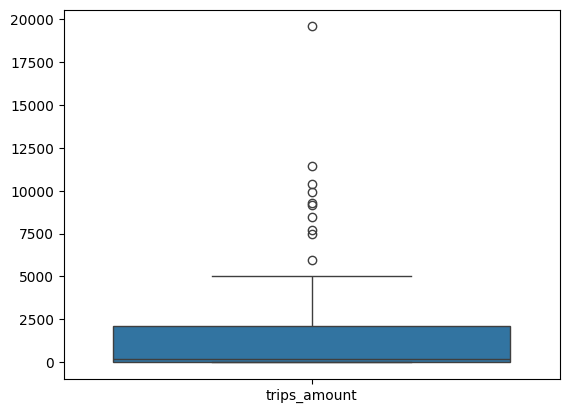

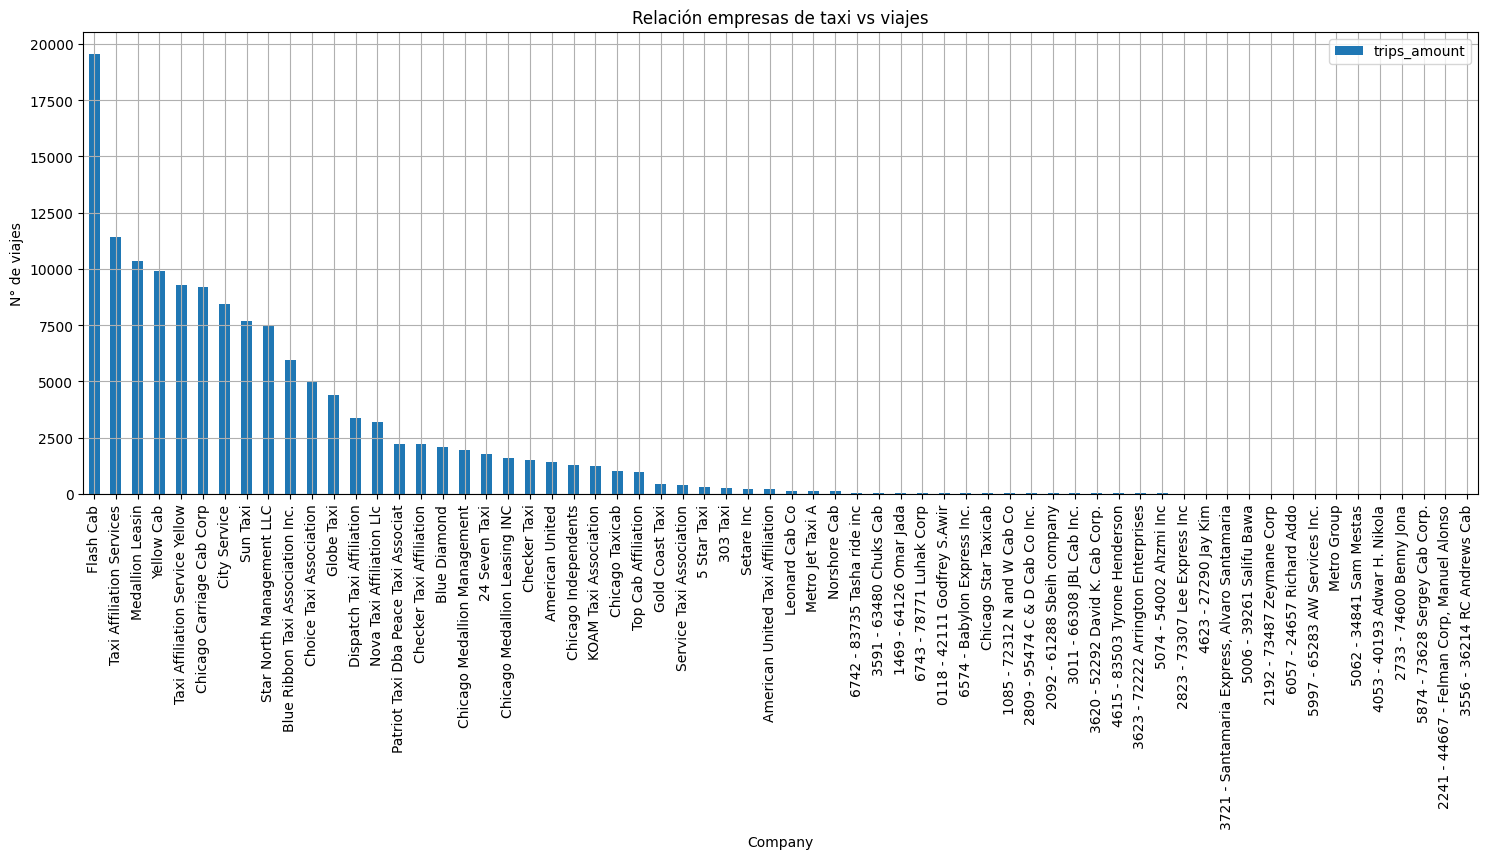

In [23]:
#hacer gráficos: 1.empresas de taxis y número de viajes

sb.boxplot(company_trips)
company_trips.plot(kind='bar', x='company_name', title= 'Relación empresas de taxi vs viajes', xlabel= 'Company', ylabel='N° de viajes', figsize=(18,6), grid = True)

Conclusión gráfica 1:
Más de la mitad de las empresas están por debajo de los 2.500 viajes. Solo 14 empresas logran pasar ese umbral. La mitad de ese selecto grupo se encuentra entre 7.500 y 10.000 viajes. Flash cab es la empresa líder en viajes. Flash cab genera un sesgo en los datos, por lo tanto no se puede considerar en esta tabla la media, exclusivamente la mediana. Hay que analizar qué hace  que esta empresa se mueva tanto y qué hace que la mayoría de empresas tenga tan pocos viajes.

<Axes: title={'center': 'Relación destino vs viajes'}, xlabel='Nombre del barrio', ylabel='N° de viajes'>

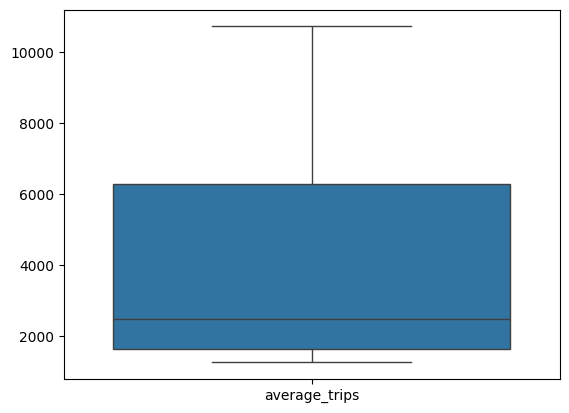

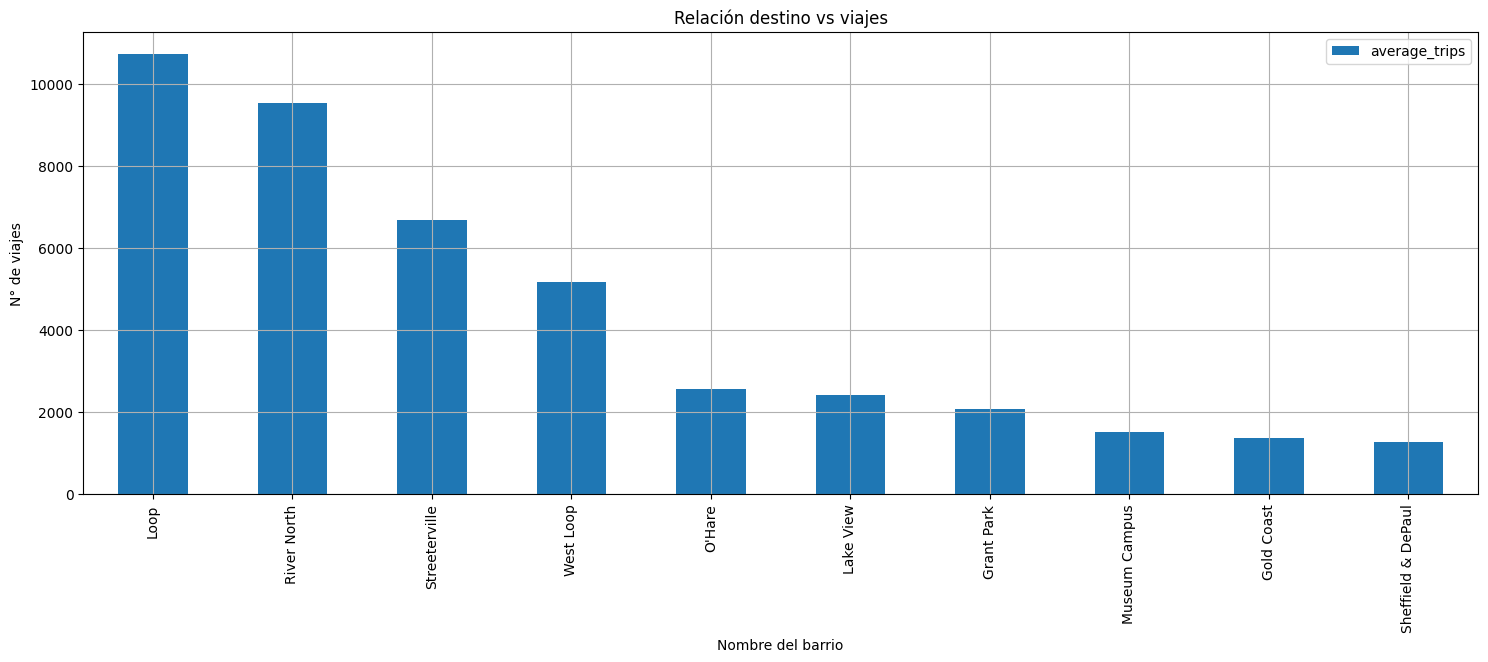

In [25]:
#hacer gráficos: 2. los 10 barrios principales por número de finalizaciones

barrios_principales = neighborhoods_trips.head(10)
sb.boxplot(barrios_principales)
barrios_principales.plot(kind='bar', x='dropoff_location_name', title= 'Relación destino vs viajes', xlabel= 'Nombre del barrio', ylabel='N° de viajes', figsize=(18,6), grid = True)

Conclusión gráfica 2: En esta tabla hay más relación entre los datos, sin embargo, las diferencias no son relevantes y hay una curva de decrecimiento.Ahora, es muy importante recalcar que los primero 4 destinos representan un número considerable de viajes. Muchas personas se dirigen a Loop, River North, Streeterville y West Loop. Es probable que sean ubicaciones industriales, comerciales o administritativas por lo que acumulan un gran número de viajes.



# Paso de prueba de hipótesis
Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:



**Planteamiento de la hipótesis:**

H₀: La duración de los viajes es la misma cuando llueve y cuando hace sol.
H₁: La duración de los viajes no es la misma cuando llueve y cuando hace sol.

¿Cómo planteaste las hipótesis nula y alternativa?

Al establecer el enunciado del cliente una relación de igualdad entre los días lluviosos y los soleados se plantean las hipótesis desde la perspectiva de la hipótesis de una cola en la que las dos medias de ambas poblaciones deben ser iguales entre sí, si en efecto la duración es igual. La hipótesis alternativa sería que no lo son y por eso mismo se rechazaría.

Como es costumbre en el mundo de la estadística, se establecerá el valor de significacncia en 0.05.


¿Qué criterio usaste para probar las hipótesis y por qué?

Se utilizó la función ttest_ind para observar los dos grupos de datos (duraciones de viaje según estado del tiempo) y comparar sus dos medias muestrales.

In [51]:
#llamar al data frame
df = pd.read_csv('/content/moved_project_sql_result_07.csv') #llamamos el dataframe de este punto
good = df.query("weather_conditions == 'Good'")['duration_seconds'] #Filtramos la tabla por aquellas filas cuya condición climática es 'Good'
bad = df.query("weather_conditions == 'Bad'")['duration_seconds']#Filtramos la tabla por aquellas filas cuya condición climática es 'Bad'
alpha= 0.05
prueba_valorp = st.ttest_ind(good, bad, equal_var=False)
print('Valor p:', prueba_valorp.pvalue)

if (prueba_valorp.pvalue < alpha):
  print('Rechazamos la hipótesis nula')
else:
  print('No podemos rechazar la hipótesis nula')

Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


Efectivamente, el clima influye en la duración de los trayectos y no son iguales con sol que con lluvia. Quizá podemos ser más específicos si queremos ver si hay diferencias o igualdad entre la duración de los trayectos con tormenta o con lluvia. Lo cierto es que es esa gran división de clima bueno y clima malo no hay igualdad entre la duración de los trayectos.

La gran conclusión de este proyecto es que hay relación entre la duración de los viajes y el clima. Hay unos destinos que están concentrando una mayor carga de usuarios (Loop, River North, Streeterville y West Loop). Flash cab es prácticamente nuestro mejor usuario y tenemos demasiadas empresas de taxis que no nos usan, quizá se pueda usar un incentivo. Finalmente no hay relación explícita entre los dataframes de compañías de taxis y destinos de usuarios. Hace falta un elemento que conecte ambas tablas para poder contruir un dataframe conjunto.